#personal information

Nama: [Roikhatul Janah]

Email: [roikhatuljanah0302@gmail.com]

ID Dicoding: [roikhatul]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [ ]:
# Download dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Tentukan direktori dataset
base_dir = 'rockpaperscissors'

# Buat list kelas yang diinginkan
valid_classes = ['rock', 'paper', 'scissors']

# Fungsi untuk memfilter kelas yang tidak diinginkan
def class_filter(class_subdirectory):
    return class_subdirectory in valid_classes

# Buat ImageDataGenerator dengan validation_split
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # 40% untuk validasi
)

# Persiapkan generator untuk data training
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=valid_classes  # Hanya gunakan kelas yang valid
)

# Persiapkan generator untuk data validasi
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=valid_classes  # Hanya gunakan kelas yang valid
)

print("Jumlah sampel training:", train_generator.n)
print("Jumlah sampel validasi:", validation_generator.n)

# Periksa urutan kelas
print("Class indices:", train_generator.class_indices)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Jumlah sampel training: 1314
Jumlah sampel validasi: 874
Class indices: {'rock': 0, 'paper': 1, 'scissors': 2}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // 32,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // 32
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3753 - loss: 1.0998 - val_accuracy: 0.5208 - val_loss: 0.9755
Epoch 2/15
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1:02 2s/step - accuracy: 0.6562 - loss: 0.8712

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 505ms/step - accuracy: 0.6562 - loss: 0.8712 - val_accuracy: 0.4000 - val_loss: 1.1340
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6639 - loss: 0.7634 - val_accuracy: 0.8067 - val_loss: 0.5170
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7188 - loss: 0.5470 - val_accuracy: 0.7000 - val_loss: 0.4439
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7872 - loss: 0.5265 - val_accuracy: 0.8160 - val_loss: 0.4539
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 467ms/step - accuracy: 0.7188 - loss: 0.6161 - val_accuracy: 0.7000 - val_loss: 0.5544
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8251 - loss: 0.4126 - val_accuracy: 0.8461 - val_loss: 0.4070
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 394ms/step - accuracy: 0.8125 - loss: 0.5483 - val_accuracy: 1.0000 - val_loss: 0.2443
Epoch 9/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.7862 - loss: 0.5251 - val_accuracy: 0.8727 - val_loss

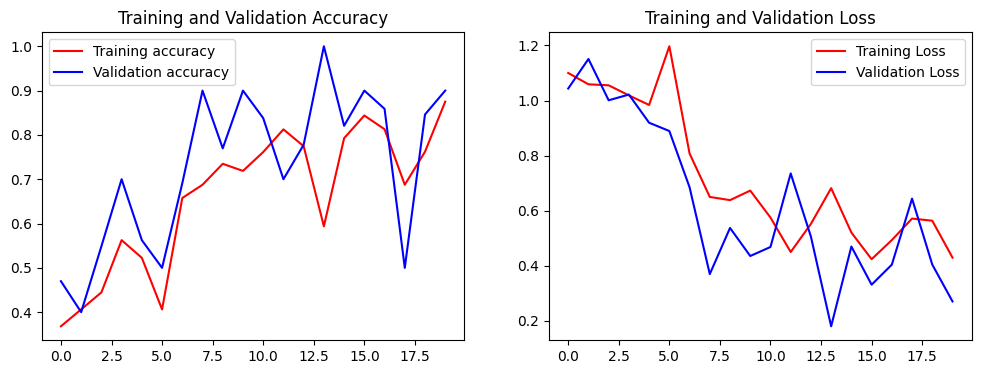

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
print("Class indices:", train_generator.class_indices)

Class indices: {'rock': 0, 'paper': 1, 'scissors': 2}


In [ ]:
import numpy as np

def predict_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_names = ['Rock', 'Paper', 'Scissors']
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence}%)")
    plt.axis('off')
    plt.show()

    print(f"This image most likely belongs to {predicted_class} with a {confidence}% confidence.")

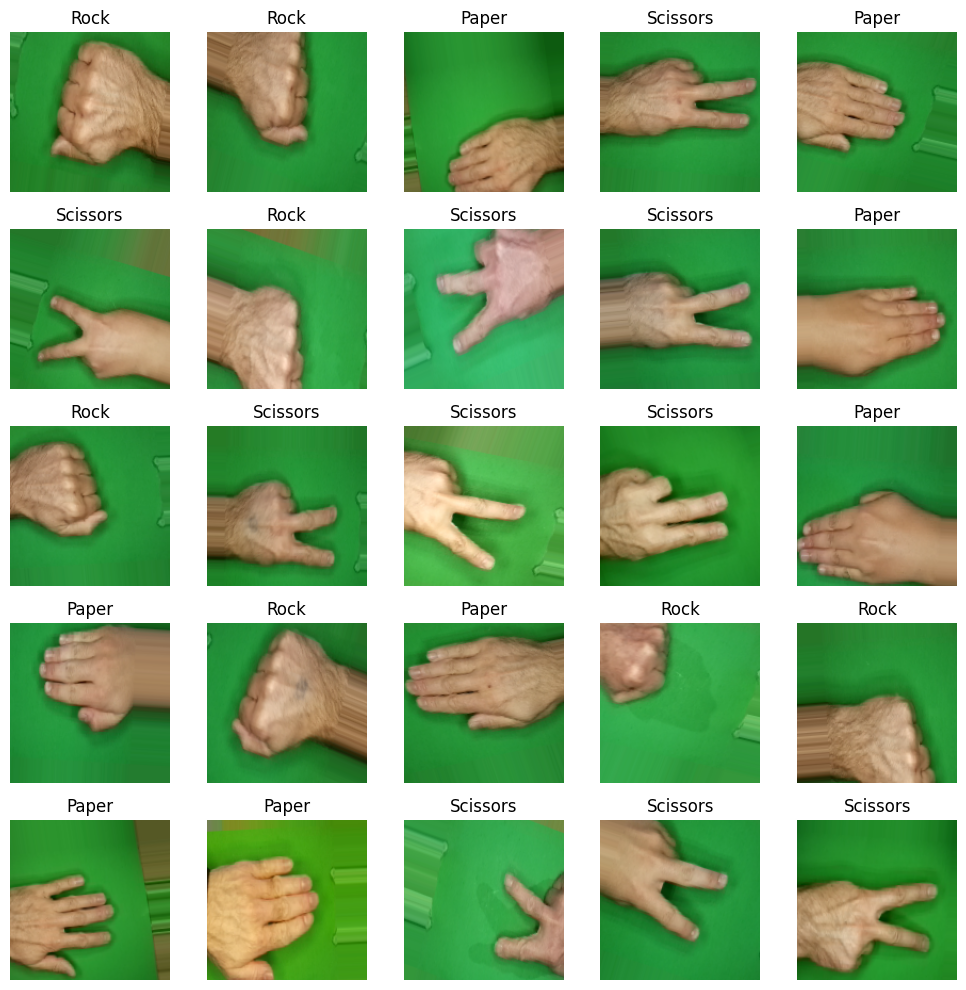

In [ ]:
import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(class_names[label_batch[n].argmax()])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

class_names = ['Rock', 'Paper', 'Scissors']  # Sesuaikan dengan urutan di class_indices
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


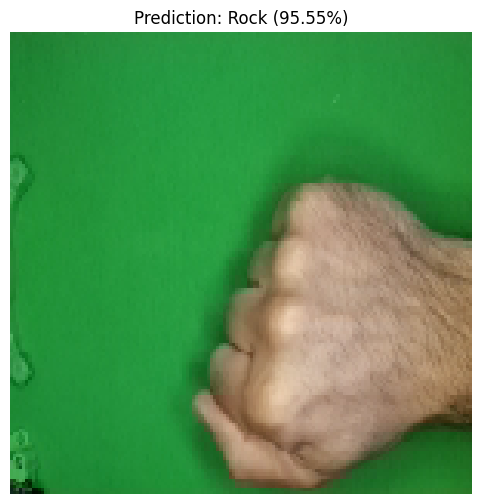

Predicted class: Rock
Confidence: 95.55%
Class probabilities:
Rock: 95.55%
Paper: 4.38%
Scissors: 0.07%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


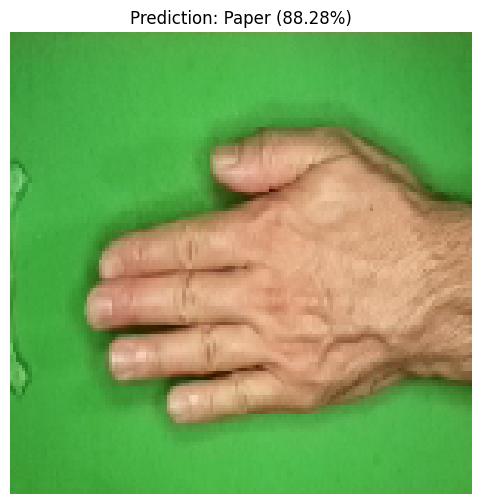

Predicted class: Paper
Confidence: 88.28%
Class probabilities:
Rock: 10.55%
Paper: 88.28%
Scissors: 1.17%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


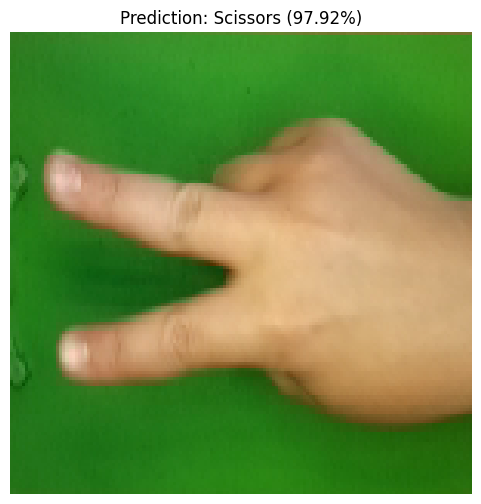

Predicted class: Scissors
Confidence: 97.92%
Class probabilities:
Rock: 0.0%
Paper: 2.08%
Scissors: 97.92%


In [ ]:
import numpy as np

def predict_and_plot(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_names = ['Rock', 'Paper', 'Scissors']  # Pastikan urutan ini sesuai dengan class_indices
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence}%)")
    plt.axis('off')
    plt.show()

    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence}%")
    print("Class probabilities:")
    for i, prob in enumerate(predictions[0]):
        print(f"{class_names[i]}: {round(100 * prob, 2)}%")

# Ganti path sesuai dengan lokasi gambar validasi Anda
predict_and_plot('/content/rockpaperscissors/rock/00nKV8oHuTGi20gq.png')
predict_and_plot('/content/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png')
predict_and_plot('/content/rockpaperscissors/scissors/0ePX1wuCc3et7leL.png')

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


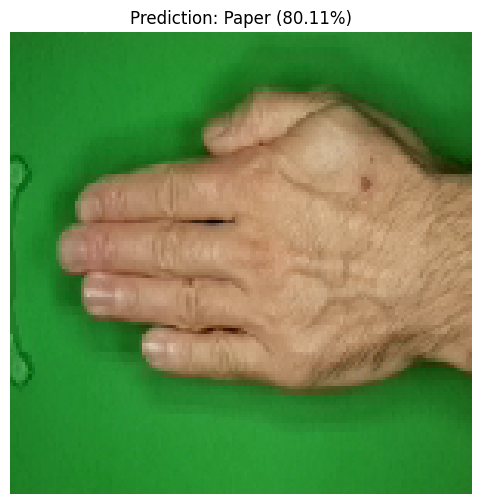

File: 0a3UtNzl5Ll3sq8K (1).png
Predicted class: Paper
Confidence: 80.11%
---


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def predict_uploaded_images():
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Memuat dan menampilkan gambar
        path = fn
        img = image.load_img(path, target_size=(150, 150))

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')

        # Memproses gambar untuk prediksi
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  # Normalisasi

        # Melakukan prediksi
        classes = model.predict(x)
        class_names = ['Rock', 'Paper', 'Scissors']
        predicted_class = class_names[np.argmax(classes[0])]
        confidence = round(100 * np.max(classes[0]), 2)

        # Menampilkan hasil prediksi
        plt.title(f"Prediction: {predicted_class} ({confidence}%)")
        plt.show()

        print(f"File: {fn}")
        print(f"Predicted class: {predicted_class}")
        print(f"Confidence: {confidence}%")
        print("---")

# Panggil fungsi untuk memulai upload dan prediksi
predict_uploaded_images()

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


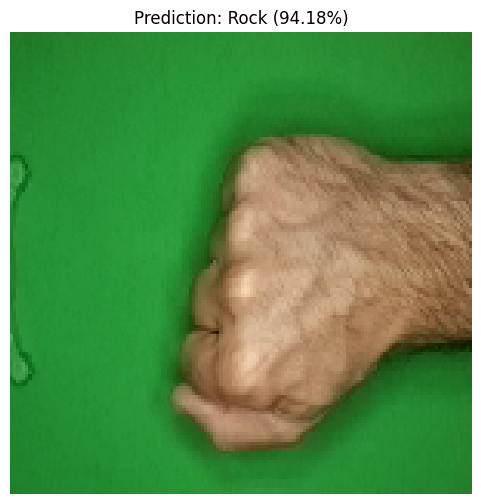

File: 0bioBZYFCXqJIulm.png
Predicted class: Rock
Confidence: 94.18%
---


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def predict_uploaded_images():
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Memuat dan menampilkan gambar
        path = fn
        img = image.load_img(path, target_size=(150, 150))

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')

        # Memproses gambar untuk prediksi
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  # Normalisasi

        # Melakukan prediksi
        classes = model.predict(x)
        class_names = ['Rock', 'Paper', 'Scissors']
        predicted_class = class_names[np.argmax(classes[0])]
        confidence = round(100 * np.max(classes[0]), 2)

        # Menampilkan hasil prediksi
        plt.title(f"Prediction: {predicted_class} ({confidence}%)")
        plt.show()

        print(f"File: {fn}")
        print(f"Predicted class: {predicted_class}")
        print(f"Confidence: {confidence}%")
        print("---")

# Panggil fungsi untuk memulai upload dan prediksi
predict_uploaded_images()

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


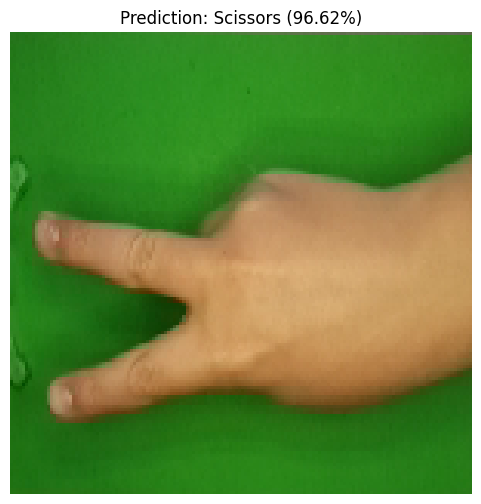

File: 0CSaM2vL2cWX6Cay.png
Predicted class: Scissors
Confidence: 96.62%
---


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def predict_uploaded_images():
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Memuat dan menampilkan gambar
        path = fn
        img = image.load_img(path, target_size=(150, 150))

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')

        # Memproses gambar untuk prediksi
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  # Normalisasi

        # Melakukan prediksi
        classes = model.predict(x)
        class_names = ['Rock', 'Paper', 'Scissors']
        predicted_class = class_names[np.argmax(classes[0])]
        confidence = round(100 * np.max(classes[0]), 2)

        # Menampilkan hasil prediksi
        plt.title(f"Prediction: {predicted_class} ({confidence}%)")
        plt.show()

        print(f"File: {fn}")
        print(f"Predicted class: {predicted_class}")
        print(f"Confidence: {confidence}%")
        print("---")

# Panggil fungsi untuk memulai upload dan prediksi
predict_uploaded_images()